# Machiavelli EDA 
- 70,000+ data points for personality, Machiavellian traits, and demographic descriptors

Subject Description: 
    
Machiavellianism is a psychological trait centered on interpersonal manipulation,
unemotional coldness, and indifference to morality. The trait is named after 
the political philosophy of Niccolò Machiavelli. Psychologists used truncated 
statements inspired by his works to study variations in human behaviors. Their 
Mach IV test, became the standard self-assessment tool and scale.Those who 
score high on the scale are more likely to have a high level of deceitfulness 
and callousness.

Data Description:

This dataset includes 20 questions for the MACH test, with 3 reported attributes (60 total), a personality identification, demographic questions, a vocabulary survey, time spend during testing, and college degree type. With over 105 columns and 70,000+ rows, I will be looking at the college degrees as a predicted target variable. 

The dataset is downloaded from Kaggle, which sourced it from openpsychometrics.org

Problem Description:
I want to take the questionairre variables of this dataset and create a predictive model for demographic attributes/college major.

Project checkpoint:

1. What problem are you trying to solve?   Classification of relationship status
2. Where does the data come from?          Openpsychometrics
3. Size of the data? Is it i.i,d.?         ~70,000, it is iid 
4. What are the columns? Type?
5. What is the target variable? Type?      Relationship status
6. What methods will be introduced? (Recommend classification or regression, etc...) 

In [2]:
!pip install opendatasets
!pip install joypy
import joypy as jp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od #use and download to avoid downloading dataset to my machine

  Using cached opendatasets-0.1.20-py3-none-any.whl (14 kB)
  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=ac7fcb8975a5cf11198fa29f8172733a3dda348da91ad92fffeb5c8b6e46a0b9
  Stored in directory: /Users/ktoleary.13/Library/Caches/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
  Using cached joypy-0.2.5-py2.py3-none-any.whl (8.4 kB)


In [4]:
od.download("https://www.kaggle.com/lucasgreenwell/machivallianism-test-responses")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: katieoleary
Your Kaggle Key: ········


 24%|██▍       | 2.00M/8.25M [00:00<00:00, 17.2MB/s]

100%|██████████| 8.25M/8.25M [00:00<00:00, 24.6MB/s]


In [5]:
#read in data set and print
data = pd.read_csv('machivallianism-test-responses/data.csv', delimiter='\t')
data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,1,4,3,60,1,1,2,Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,9925.0,1.0,6.0,14218.0,2.0,16.0,25499.0,4.0,...,2048.0,1080.0,1,12,1,10,2,2,1,business
73485,5.0,9.0,5816.0,5.0,4.0,4368.0,1.0,15.0,7246.0,1.0,...,1440.0,900.0,1,2,3,60,2,1,2,sociology
73486,2.0,17.0,5353.0,1.0,18.0,6846.0,1.0,9.0,4920.0,1.0,...,1280.0,1024.0,1,1,1,60,2,1,3,NaN
73487,4.0,15.0,7974.0,3.0,9.0,7901.0,5.0,17.0,8647.0,3.0,...,414.0,736.0,1,3,1,10,1,1,4,Business


In [6]:
data['major'] = data['major'].str.lower() #normalize strings by lowercase
data['major'] = data['major'].fillna('')   #remove NaN values
#Fill the nans with ''. This is the same encoding scheme for married col. Does not adjust the mscore at all
major_data=data    
print(len(list(data['major']))) #there are 7366 unique values and 47151 college major values
major_data.head()

73489


,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,1,7,1,30,1,2,5,marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,1,2,2,10,2,1,2,chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,1,4,3,60,1,1,2,management


In [7]:
#get types of each column
for name in list(major_data.columns):
    print(name, 'contains',major_data[name].dtype) #print data types
    #the country and the major should be strings but return as object.

Q1A contains float64
Q1I contains float64
Q1E contains float64
Q2A contains float64
Q2I contains float64
Q2E contains float64
Q3A contains float64
Q3I contains float64
Q3E contains float64
Q4A contains float64
Q4I contains float64
Q4E contains float64
Q5A contains float64
Q5I contains float64
Q5E contains float64
Q6A contains float64
Q6I contains float64
Q6E contains float64
Q7A contains float64
Q7I contains float64
Q7E contains float64
Q8A contains float64
Q8I contains float64
Q8E contains float64
Q9A contains float64
Q9I contains float64
Q9E contains float64
Q10A contains float64
Q10I contains float64
Q10E contains float64
Q11A contains float64
Q11I contains float64
Q11E contains float64
Q12A contains float64
Q12I contains float64
Q12E contains float64
Q13A contains float64
Q13I contains float64
Q13E contains float64
Q14A contains float64
Q14I contains float64
Q14E contains float64
Q15A contains float64
Q15I contains float64
Q15E contains float64
Q16A contains float64
Q16I contains f

Most data is clean, but some of the individual questions for the surveys have NaNs. Because zero has no meaning on the likert-scale, we can convert these values to zero and establish a category for the missing values. This way, we can check if there is potential meaning in these missing values but wrap them in a more usable data type. 

In [8]:
#Look at unique values of features 
#get types of each column
for name in list(major_data.columns):
    print(name, "contains", major_data[name].unique())
major_data.shape

#the tranformer doesnt like the NaNs, we'll turn these into zeros, which is also used in the married column
mquestions = ['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A','Q11A', 'Q12A', 'Q13A', 'Q14A', \
          'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A']
#Fill the nans with 0. This is the same encoding scheme for married col. Does not adjust the mscore at all
for q in mquestions:
    major_data[q] = major_data[q].fillna(0)

#get types of each column
for name in mquestions:
    print(name, "contains", major_data[name].unique())

Q1A contains [ 3.  5.  2.  4.  1. nan]
Q1I contains [ 6. 17. 16. 12. 13.  4. 11.  7.  1.  2. 15. 14.  9.  3. 19. 10. 18.  8.
  5. 20. nan]
Q1E contains [21017.  3818.  4186. ... 27049. 18991. 29275.]
Q2A contains [ 3.  5.  4.  2.  1. nan]
Q2I contains [ 7.  9. 12.  1.  5. 10. 15. 11. 19. 16. 14. 17. 13.  8.  6.  2. 18. 20.
  4.  3. nan]
Q2E contains [18600.  7850.  2900. ... 11625. 15149. 25595.]
Q3A contains [ 5.  1.  2.  3.  4. nan]
Q3I contains [20. 16.  2.  7. 19. 15. 17. 10.  9.  6.  3.  8. 11. 13. 14.  4. 18.  1.
 12.  5. nan]
Q3E contains [14957.  5902.  7160. ... 17794. 25499. 37103.]
Q4A contains [ 2.  3.  1.  4.  5. nan]
Q4I contains [ 5. 15.  4.  3. 12.  8. 14. 13.  9. 10. 20. 18.  1.  7.  2. 19. 11. 17.
  6. 16. nan]
Q4E contains [12038.  5798.  2733. ... 24928. 17823. 60638.]
Q5A contains [ 3.  5.  2.  4.  1. nan]
Q5I contains [10.  1.  9. 13.  5. 19. 15. 12. 18. 17. 20.  2.  8. 14.  3.  6. 11. 16.
  4.  7. nan]
Q5E contains [21089.  7301.  5549. ... 25024. 16252. 46247.]


major contains ['marketing ' 'mathematics' 'chemistry' ... 'preschool education '
 'politcial science' 'electronic information']
Q1A contains [3. 5. 2. 4. 1. 0.]
Q2A contains [3. 5. 4. 2. 1. 0.]
Q3A contains [5. 1. 2. 3. 4. 0.]
Q4A contains [2. 3. 1. 4. 5. 0.]
Q5A contains [3. 5. 2. 4. 1. 0.]
Q6A contains [1. 3. 4. 2. 5. 0.]
Q7A contains [2. 1. 3. 5. 4. 0.]
Q8A contains [4. 5. 2. 3. 1. 0.]
Q9A contains [3. 2. 1. 4. 5. 0.]
Q10A contains [3. 1. 2. 5. 4. 0.]
Q11A contains [1. 3. 2. 4. 5. 0.]
Q12A contains [5. 4. 2. 3. 1. 0.]
Q13A contains [4. 5. 1. 3. 2. 0.]
Q14A contains [1. 2. 3. 4. 5. 0.]
Q15A contains [5. 4. 1. 3. 2. 0.]
Q16A contains [2. 1. 5. 4. 3. 0.]
Q17A contains [4. 2. 1. 3. 5. 0.]
Q18A contains [4. 5. 2. 3. 1. 0.]
Q19A contains [4. 5. 3. 1. 2. 0.]
Q20A contains [4. 3. 1. 2. 5. 0.]


In [9]:
#REMOVE the ages that are wrong
print(major_data.shape)
print(len((major_data['age'].unique())<120)/(major_data.shape)[0]) #the wrong ages make up 0.2% data - will drop these
#drop the values that are not real ages
major_data = major_data[major_data['age']<120]   

#remove wrong family sizes
print(major_data.shape)
print(len((major_data['familysize'].unique())<20)/(major_data.shape)[0]) #the wrong ages make up 0.2% data - will drop these
major_data = major_data[major_data['familysize']<20]

#Remove non-answers for relationship
print(len((major_data['married'].unique())==0)/(major_data.shape)[0])
major_data = major_data[major_data['married']!=0]   

(73489, 105)
0.0013607478670277183
(73470, 105)
0.0004763849190145638
5.446029844243546e-05


With the goal of this project, I don't want participants who are too young. For example, a 15 year old will not be married, but might still contribute a MACH IV score. Using census website for the average age of first marriage, I decided to make a lower bound of 30 years old. This way, I'm including the data point who actually have the possibility of contributing substantially to the MACH IV scores and of having a relationship status representative of their personality. 
https://www.census.gov/content/dam/Census/library/visualizations/time-series/demo/families-and-households/ms-2.pdf

[3 1 2]


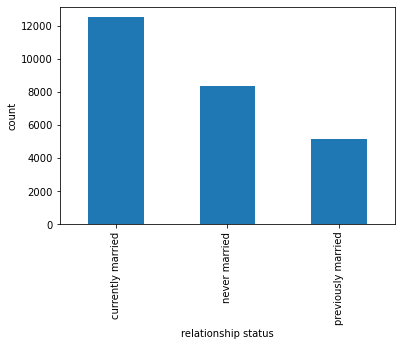

32310084.0


In [10]:
#filter down by ages (bc relationship status is tightly correlated) 
major_data = major_data[major_data['age']>30]   
#distribution of the target variable
#unique values
print(major_data["married"].unique())
#1 = never married , 2 = currently married, 3=previously married
string_dict = {1: "never married", 2: "currently married", 3: "previously married"}
major_data['marriedstr'] = major_data['married'].map(string_dict)

pd.value_counts(major_data['marriedstr']).plot.bar()
plt.ylabel('count')
plt.xlabel('relationship status')
plt.show()
#substantial difference in group size

print(major_data["Q1E"].max())

NOTES: 
Mach tests or personality tests are scored so I'll have to make the aggregate myself: https://core.ac.uk/download/pdf/38810542.pdf for breakdown

# scoring 
(none of the mach IV test aggregate scores are a column) 
NEGATIVE INTERPERSONAL TACTICS: questions 1,2,15,12

POSITIVE INTERPERSONAL TACTICS: questions 6,7,9,10,3,16

CYNICAL VIEW OF HUMAN NATURE: questions 5,17,13,20,8,18

POSITIVE VIEW OF HUMAN NAUTURE: question 4, 11, 14, 19

to be the High Mach, NIT & CVH would be high and PIT & PVH would be low. 

The highest score is 100. However, for positive questions, a 1, not a 5, would correspond to more machivalianism. The 1-5 on PIT and PVH should be reversesed when adding to the aggregate score.

for the personality inventory:
https://www.psytoolkit.org/survey-library/big5-tipi.html

Answered in Survey Q5A


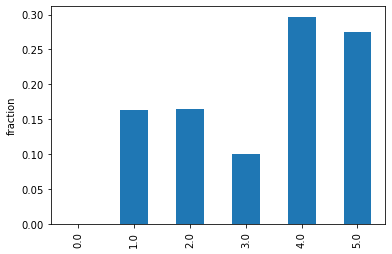

Place in Survey Q5I


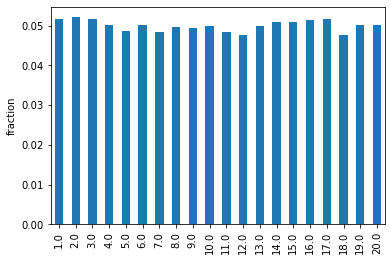

Time Elapsed for Question Q5E


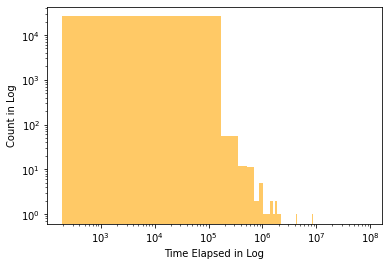

Answered in Survey Q17A


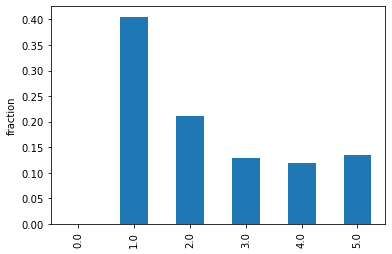

Place in Survey Q17I


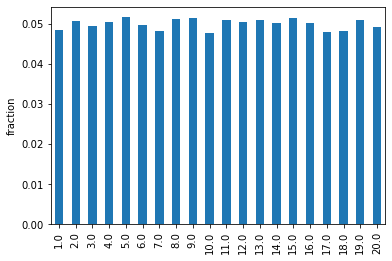

Time Elapsed for Question Q17E


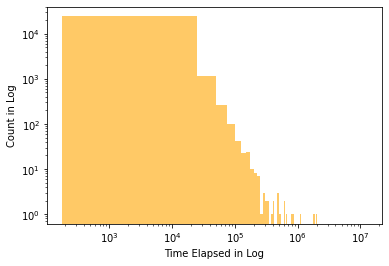

Answered in Survey Q13A


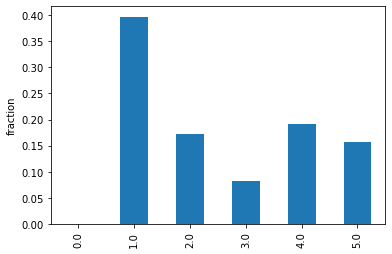

Place in Survey Q13I


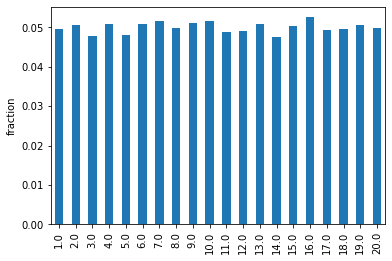

Time Elapsed for Question Q13E


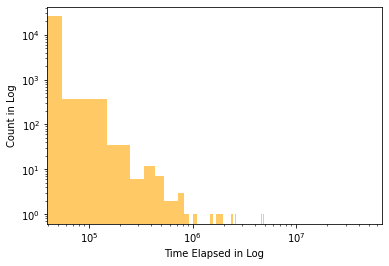

Answered in Survey Q20A


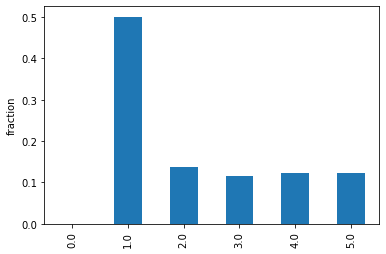

Place in Survey Q20I


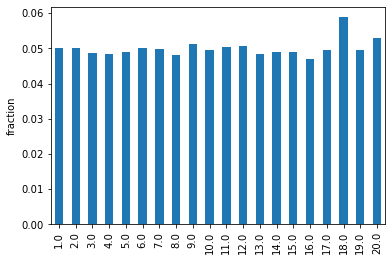

Time Elapsed for Question Q20E


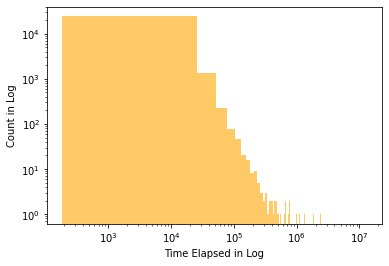

Answered in Survey Q8A


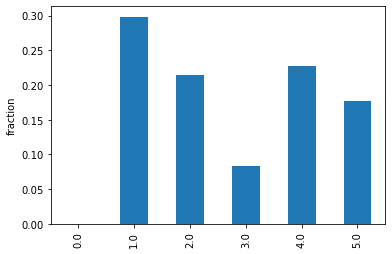

Place in Survey Q8I


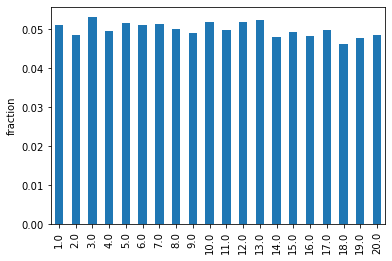

Time Elapsed for Question Q8E


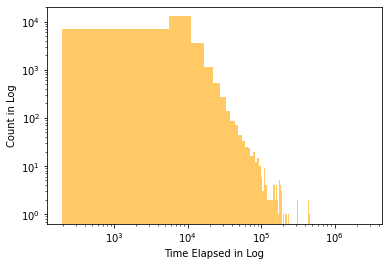

Answered in Survey Q18A


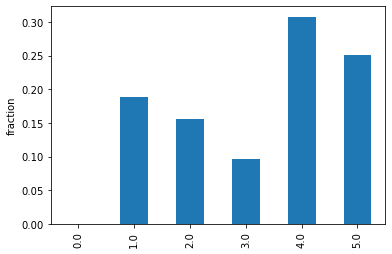

Place in Survey Q18I


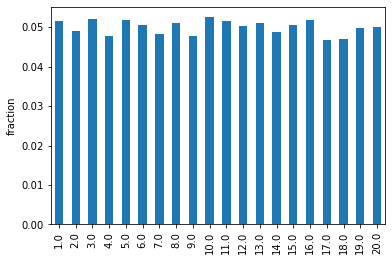

Time Elapsed for Question Q18E


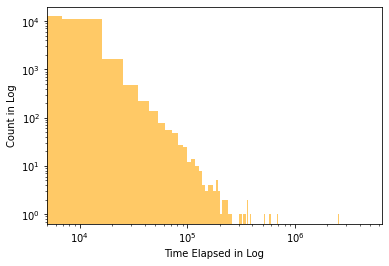

In [11]:
#SPLIT THE QUESTIONS IN THEIR RELATIVE DOMAIN
PIT = ["Q6A", "Q6I", "Q6E","Q7A", "Q7I", "Q7E","Q9A", "Q9I", "Q9E","Q10A", "Q10I", "Q10E","Q3A", "Q3I", "Q3E","Q16A", "Q16I", "Q16E"]
NIT = ["Q1A", "Q1I", "Q1E","Q2A", "Q2I", "Q2E","Q15A", "Q15I", "Q15E","Q12A", "Q12I", "Q12E"]
CVH = ["Q5A", "Q5I", "Q5E","Q17A", "Q17I", "Q17E","Q13A", "Q13I", "Q13E","Q20A", "Q20I", "Q20E","Q8A", "Q8I", "Q8E","Q18A", "Q18I", "Q18E"]
PVH = ["Q4A", "Q4I", "Q4E","Q11A", "Q11I", "Q11E","Q14A", "Q14I", "Q14E","Q19A", "Q19I", "Q19E"]
ALLM = PIT + NIT + CVH + PVH

#CATEGORICAL OR CONTINUOUS PLOTS
for name in CVH: 
    if "A" in name:
        print("Answered in Survey", name)
        pd.value_counts(major_data[name],normalize=True).sort_index().plot.bar()
        plt.ylabel('fraction')
        plt.show()
    elif "I" in name:
        print("Place in Survey", name)
        pd.value_counts(major_data[name],normalize=True).sort_index().plot.bar()
        plt.ylabel('fraction')
        plt.show()
    elif "E" in name:
        print("Time Elapsed for Question", name)
        major_data[name].plot.hist(bins = 500, alpha = 0.6, color = "orange")
        plt.semilogx()
        plt.semilogy()
        plt.ylabel('Count in Log')
        plt.xlabel('Time Elapsed in Log')
        plt.show()

In [12]:
(major_data.describe())

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize
count,26043.000000,26041.000000,2.604100e+04,26043.000000,26041.000000,2.604100e+04,26043.000000,26041.000000,2.604100e+04,26043.000000,...,26043.000000,26043.000000,26043.000000,26043.000000,26043.000000,26043.000000,26043.000000,26043.000000,26043.000000,26043.000000
mean,2.889106,10.542030,1.362441e+04,2.913144,10.567682,1.133135e+04,2.973889,10.493875,1.319268e+04,3.171754,...,43.747571,959.645433,817.088315,1.157278,4.808624,1.218485,54.072112,1.372768,1.877280,2.800177
std,1.563245,5.748553,2.108947e+05,1.491310,5.776219,1.328070e+05,1.466366,5.771917,5.479279e+04,1.418128,...,10.345347,627.447174,201.109521,0.448901,3.530552,0.726283,16.918845,0.502630,0.710054,1.627325
min,0.000000,1.000000,1.840000e+02,0.000000,1.000000,1.920000e+02,0.000000,1.000000,1.810000e+02,0.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,6.000000,5.749000e+03,1.000000,6.000000,5.003000e+03,2.000000,5.000000,6.265000e+03,2.000000,...,35.000000,375.000000,667.000000,1.000000,2.000000,1.000000,60.000000,1.000000,1.000000,2.000000
50%,3.000000,11.000000,7.905000e+03,3.000000,11.000000,6.904000e+03,3.000000,11.000000,8.745000e+03,3.000000,...,41.000000,768.000000,768.000000,1.000000,4.000000,1.000000,60.000000,1.000000,2.000000,2.000000
75%,4.000000,16.000000,1.179800e+04,4.000000,16.000000,1.004800e+04,4.000000,16.000000,1.302500e+04,4.000000,...,50.000000,1440.000000,960.000000,1.000000,7.000000,1.000000,60.000000,2.000000,2.000000,3.000000
max,5.000000,20.000000,3.231008e+07,5.000000,20.000000,1.494796e+07,5.000000,20.000000,3.939294e+06,5.000000,...,110.000000,7680.000000,2880.000000,3.000000,12.000000,5.000000,70.000000,2.000000,3.000000,17.000000


In [13]:
#AGGREGATE AND SCORE THE MACH IV --> New Feature
#flip values on likert scale so running sum contributes to mach trait
print(major_data[["Q4A", "Q6A","Q16E"]].head())
flip_dict = {1.0: 5.0, 2.0: 4.0, 3.0: 3.0, 4.0: 2.0, 5.0:1.0}
for col in list(filter(lambda name: "A" in name, PVH)):
    major_data[col] = major_data[col].map(flip_dict)
for col in list(filter(lambda name: "A" in name, PIT)):
    major_data[col] = major_data[col].map(flip_dict)
print(major_data[["Q4A","Q6A","Q16E"]].head()) #check the values are the right output

    Q4A  Q6A    Q16E
3   1.0  1.0  4635.0
7   2.0  4.0  4152.0
11  4.0  4.0  4549.0
12  3.0  1.0  6434.0
15  4.0  4.0  2593.0
    Q4A  Q6A    Q16E
3   5.0  5.0  4635.0
7   4.0  2.0  4152.0
11  2.0  2.0  4549.0
12  3.0  5.0  6434.0
15  2.0  2.0  2593.0


In [14]:
#SUM THE MACH SCORES TO GET TOTAL OUT OF 100
ALL_MA = ["Q6A","Q7A","Q9A","Q10A","Q3A","Q16A","Q1A","Q2A","Q15A","Q12A","Q5A","Q17A","Q13A","Q20A","Q8A","Q18A","Q4A","Q11A","Q14A","Q19A"]
major_data["Mscore"] = major_data[ALL_MA].sum(axis=1)
major_data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,hand,religion,orientation,race,voted,married,familysize,major,marriedstr,Mscore
3,2.0,12.0,9373.0,4.0,1.0,10171.0,4.0,7.0,10117.0,5.0,...,1,6,1,60,1,3,2,international relations,previously married,74.0
7,4.0,6.0,10501.0,4.0,15.0,3773.0,3.0,2.0,10626.0,4.0,...,1,1,1,10,2,1,1,biology,never married,69.0
11,4.0,2.0,35754.0,2.0,14.0,6692.0,3.0,6.0,7414.0,2.0,...,1,12,1,30,2,1,2,,never married,57.0
12,5.0,15.0,5836.0,5.0,1.0,1882.0,1.0,3.0,5887.0,3.0,...,2,1,1,60,2,2,2,,currently married,76.0
15,2.0,16.0,5258.0,4.0,11.0,4839.0,2.0,6.0,8602.0,2.0,...,1,2,1,60,1,3,3,music,previously married,56.0


In [15]:
#DROP UNECESSARY COLUMNS/UNUSABLE DATA
position = list(filter(lambda name: "I" in name, ALLM))
major_data = major_data.drop(columns = ["screenh", "screenw", "country","introelapse","surveyelapse"])
major_data = major_data.drop(columns = position)
print(major_data.shape)
major_data.head()

(26043, 82)


,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,hand,religion,orientation,race,voted,married,familysize,major,marriedstr,Mscore
3,2.0,9373.0,4.0,10171.0,4.0,10117.0,5.0,4346.0,5.0,16775.0,...,1,6,1,60,1,3,2,international relations,previously married,74.0
7,4.0,10501.0,4.0,3773.0,3.0,10626.0,4.0,8846.0,5.0,10198.0,...,1,1,1,10,2,1,1,biology,never married,69.0
11,4.0,35754.0,2.0,6692.0,3.0,7414.0,2.0,3636.0,4.0,12792.0,...,1,12,1,30,2,1,2,,never married,57.0
12,5.0,5836.0,5.0,1882.0,1.0,5887.0,3.0,6032.0,5.0,11008.0,...,2,1,1,60,2,2,2,,currently married,76.0
15,2.0,5258.0,4.0,4839.0,2.0,8602.0,2.0,11205617.0,2.0,5873.0,...,1,2,1,60,1,3,3,music,previously married,56.0


In [16]:
#FEATURE ENGINEER TIME FOR EACH CLASS OF QUESTION
ALL_ME = ["Q6E","Q7E","Q9E","Q10E","Q3E","Q16E","Q1E","Q2E","Q15E","Q12E","Q5E","Q17E","Q13E","Q20E","Q8E","Q18E","Q4E","Q11E","Q14E","Q19E"]
#CATEGORICAL OR CONTINUOUS PLOTS
for elem in PIT:
    PITelapse = []
    if "E" in elem:
        PITelapse.append(elem)  
    major_data["PITtime"] = major_data[PITelapse].sum(axis=1)
major_data.head() #check output


,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,religion,orientation,race,voted,married,familysize,major,marriedstr,Mscore,PITtime
3,2.0,9373.0,4.0,10171.0,4.0,10117.0,5.0,4346.0,5.0,16775.0,...,6,1,60,1,3,2,international relations,previously married,74.0,4635.0
7,4.0,10501.0,4.0,3773.0,3.0,10626.0,4.0,8846.0,5.0,10198.0,...,1,1,10,2,1,1,biology,never married,69.0,4152.0
11,4.0,35754.0,2.0,6692.0,3.0,7414.0,2.0,3636.0,4.0,12792.0,...,12,1,30,2,1,2,,never married,57.0,4549.0
12,5.0,5836.0,5.0,1882.0,1.0,5887.0,3.0,6032.0,5.0,11008.0,...,1,1,60,2,2,2,,currently married,76.0,6434.0
15,2.0,5258.0,4.0,4839.0,2.0,8602.0,2.0,11205617.0,2.0,5873.0,...,2,1,60,1,3,3,music,previously married,56.0,2593.0


In [17]:
#sum the time for category of time and drop the indiv. times of questions
for elem in NIT:
    NITelapse = []
    if "E" in elem:
        NITelapse.append(elem)
        
    major_data["NITtime"] = major_data[NITelapse].sum(axis=1)

for elem in PVH:
    PVHelapse = []
    if "E" in elem:
        PVHelapse.append(elem)
        
    major_data["PVHtime"] = major_data[PVHelapse].sum(axis=1)

for elem in CVH:
    CVHelapse = []
    if "E" in elem:
        CVHelapse.append(elem)
        
    major_data["CVHtime"] = major_data[CVHelapse].sum(axis=1)

times_out = list(filter(lambda name: "E" in name, ALLM))
major_data = major_data.drop(columns = times_out)
print(major_data.shape)
major_data.head()

(26043, 66)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,voted,married,familysize,major,marriedstr,Mscore,PITtime,NITtime,PVHtime,CVHtime
3,2.0,4.0,4.0,5.0,5.0,5.0,3.0,2.0,2.0,4.0,...,1,3,2,international relations,previously married,74.0,4635.0,6799.0,12788.0,7297.0
7,4.0,4.0,3.0,4.0,5.0,2.0,5.0,5.0,2.0,4.0,...,2,1,1,biology,never married,69.0,4152.0,7035.0,6411.0,7910.0
11,4.0,2.0,3.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,...,2,1,2,,never married,57.0,4549.0,8907.0,15823.0,6442.0
12,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,3.0,1.0,...,2,2,2,,currently married,76.0,6434.0,8994.0,27609.0,6739.0
15,2.0,4.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,...,1,3,3,music,previously married,56.0,2593.0,12294.0,4149.0,8038.0


In [18]:
#PAIR DOWN THE VOCAB_threshold of how many known and if non-words known
allcols = list(major_data.columns)
vocab_list = list(filter(lambda name: "VCL" in name, allcols))
#fake vocab known? 0-3 vals possible
major_data["voc_fake"] = major_data[["VCL6", "VCL9", "VCL12"]].sum(axis=1)
                  
#total vocab known
major_data["voc_conf"] = major_data[vocab_list].sum(axis=1)
                  
#drop individual vocab words
major_data = major_data.drop(columns = vocab_list)
print(major_data.shape)
major_data.head()

(26043, 52)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,familysize,major,marriedstr,Mscore,PITtime,NITtime,PVHtime,CVHtime,voc_fake,voc_conf
3,2.0,4.0,4.0,5.0,5.0,5.0,3.0,2.0,2.0,4.0,...,2,international relations,previously married,74.0,4635.0,6799.0,12788.0,7297.0,1,11
7,4.0,4.0,3.0,4.0,5.0,2.0,5.0,5.0,2.0,4.0,...,1,biology,never married,69.0,4152.0,7035.0,6411.0,7910.0,0,10
11,4.0,2.0,3.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,...,2,,never married,57.0,4549.0,8907.0,15823.0,6442.0,0,8
12,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,3.0,1.0,...,2,,currently married,76.0,6434.0,8994.0,27609.0,6739.0,0,8
15,2.0,4.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,...,3,music,previously married,56.0,2593.0,12294.0,4149.0,8038.0,0,10


In [19]:
major_data.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'testelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5',
       'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'education', 'urban',
       'gender', 'engnat', 'age', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'major', 'marriedstr', 'Mscore',
       'PITtime', 'NITtime', 'PVHtime', 'CVHtime', 'voc_fake', 'voc_conf'],
      dtype='object')

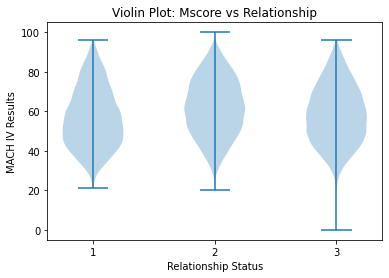

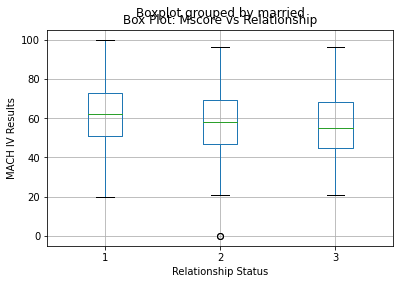

In [20]:
#MACH SCORE VS RELATIONSHIP _ continuous vs categorical
#1 = never married , 2 = currently married, 3=previously married
dataset = []
for num in major_data["marriedstr"].unique():   #split data 
    dataset.append(major_data[major_data["marriedstr"]== num]["Mscore"])
plt.violinplot(dataset = dataset )
plt.xticks([1,2,3])
plt.title('Violin Plot: Mscore vs Relationship')
plt.ylabel('MACH IV Results')
plt.xlabel('Relationship Status')
plt.show()

#same plot but in boxes
major_data[['Mscore','married']].boxplot(by='married')
plt.ylabel('MACH IV Results')
plt.title('Box Plot: Mscore vs Relationship')
plt.xlabel('Relationship Status')
plt.show()

#the location of the mean Mscore differs but not significantly
#a couple of outliers changes the range on 3

Time Elapsed for Category of Question NITtime
count    2.604300e+04
mean     2.060501e+04
std      1.575829e+06
min      0.000000e+00
25%      5.065000e+03
50%      6.994000e+03
75%      1.048550e+04
max      2.541563e+08
Name: NITtime, dtype: float64


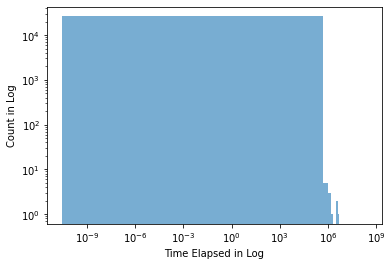

Time Elapsed for Category of Question PITtime
count    2.604300e+04
mean     9.777855e+03
std      6.673033e+04
min      0.000000e+00
25%      4.401500e+03
50%      6.175000e+03
75%      9.145000e+03
max      7.506924e+06
Name: PITtime, dtype: float64


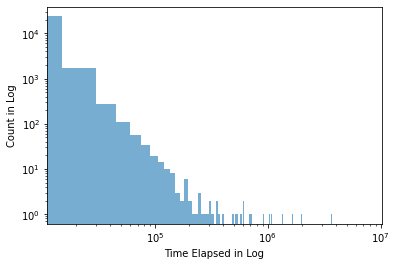

Time Elapsed for Category of Question PVHtime
count    2.604300e+04
mean     1.382524e+04
std      2.030035e+05
min      0.000000e+00
25%      6.137500e+03
50%      8.489000e+03
75%      1.238850e+04
max      2.902558e+07
Name: PVHtime, dtype: float64


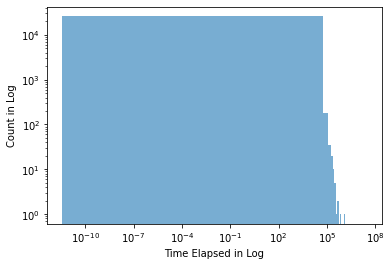

Time Elapsed for Category of Question CVHtime
count    2.604300e+04
mean     1.081655e+04
std      4.421815e+04
min     -1.167700e+04
25%      5.096000e+03
50%      7.055000e+03
75%      1.046200e+04
max      4.624276e+06
Name: CVHtime, dtype: float64


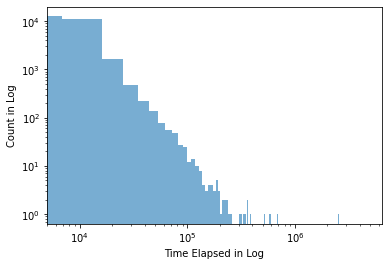

In [21]:
#AVERAGE TIME SPENT ON CATEGORIES OF QUESTIONS
for name in major_data[["NITtime","PITtime","PVHtime","CVHtime"]]:
    print("Time Elapsed for Category of Question", name)
    print(major_data[name].describe())
    major_data[name].plot.hist(bins = 500, alpha = 0.6)
    plt.semilogx()
    plt.semilogy()
    plt.ylabel('Count in Log')
    plt.xlabel('Time Elapsed in Log')
    plt.show()
    


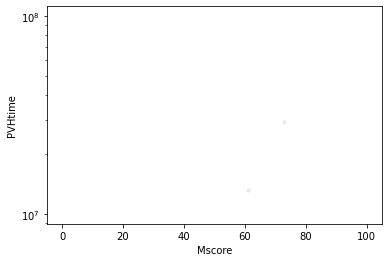

In [22]:
#the pvh by far has the biggest range.
#PVH versus MACH IV 
major_data.plot.scatter('Mscore','PVHtime',alpha=0.1,s=10) # alpha=0.1,s=10
plt.semilogy()
plt.show()

Now that we've aggregated the MACH IV scores, the vocab test, and the timing of the test, let's look at the big five personality test. The TIPI is a very quick survey that looks at the big five personality score. A reference ot how to score is below. 

Scoring TIPI:
TIPI scale scoring (“R” denotes reverse-scored items): Extraversion: 1, 6R; Agreeableness: 2R, 7; Conscientiousness; 3, 8R; Emotional Stability: 4R, 9; Openness to Experiences: 5, 10R.
https://fetzer.org/sites/default/files/images/stories/pdf/selfmeasures/Personality-TenItemPersonalityInventory.pdf

We can break down the TIPI into the Big Five trait scoring (reduce the ten columns down to five) 

In [23]:
#SCORE THE TIPI AND FLIP REVERSE QUESTIONS
TIPI_list = list(filter(lambda name: "TIPI" in name, allcols))

#flip values on 7point scale so running sum contributes to each trait
print(major_data[["TIPI6", "TIPI2","TIPI8","TIPI4","TIPI10"]].head())
flip_tipi = {1.0: 7.0, 2.0: 6.0, 3.0: 5.0, 4.0: 4.0, 5.0:5.0, 6.0:2.0, 7.0:1.0}
for col in list(filter(lambda name: "TIPI" in name, TIPI_list)):
    major_data[col] = major_data[col].map(flip_tipi)
print(major_data[["TIPI6", "TIPI2","TIPI8","TIPI4","TIPI10"]].head())

    TIPI6  TIPI2  TIPI8  TIPI4  TIPI10
3       2      5      2      7       3
7       7      5      3      2       4
11      7      7      2      2       6
12      4      4      1      5       7
15      5      3      5      7       4
    TIPI6  TIPI2  TIPI8  TIPI4  TIPI10
3     6.0    5.0    6.0    1.0     5.0
7     1.0    5.0    5.0    6.0     4.0
11    1.0    1.0    6.0    6.0     2.0
12    4.0    4.0    7.0    5.0     1.0
15    5.0    5.0    5.0    1.0     4.0


In [24]:
#SUM Big5 COMPONENTS
#the max for each component of the big 5 is 14points
major_data["extraver"] = major_data[["TIPI1","TIPI6"]].sum(axis=1)
major_data["agreeable"] = major_data[["TIPI2","TIPI7"]].sum(axis=1)
major_data["conscient"] = major_data[["TIPI3","TIPI8"]].sum(axis=1)
major_data["neuroticism"] = major_data[["TIPI4","TIPI9"]].sum(axis=1)
major_data["openness"] = major_data[["TIPI5","TIPI10"]].sum(axis=1)
major_data = major_data.drop(columns = TIPI_list)
print(major_data.shape)
major_data.head()

(26043, 47)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,NITtime,PVHtime,CVHtime,voc_fake,voc_conf,extraver,agreeable,conscient,neuroticism,openness
3,2.0,4.0,4.0,5.0,5.0,5.0,3.0,2.0,2.0,4.0,...,6799.0,12788.0,7297.0,1,11,8.0,7.0,11.0,7.0,6.0
7,4.0,4.0,3.0,4.0,5.0,2.0,5.0,5.0,2.0,4.0,...,7035.0,6411.0,7910.0,0,10,6.0,10.0,7.0,8.0,6.0
11,4.0,2.0,3.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,...,8907.0,15823.0,6442.0,0,8,6.0,6.0,8.0,7.0,4.0
12,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,3.0,1.0,...,8994.0,27609.0,6739.0,0,8,5.0,5.0,8.0,10.0,2.0
15,2.0,4.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,...,12294.0,4149.0,8038.0,0,10,9.0,10.0,7.0,5.0,5.0


In [25]:
major_data.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'testelapse', 'education', 'urban', 'gender', 'engnat', 'age',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'major', 'marriedstr', 'Mscore', 'PITtime', 'NITtime',
       'PVHtime', 'CVHtime', 'voc_fake', 'voc_conf', 'extraver', 'agreeable',
       'conscient', 'neuroticism', 'openness'],
      dtype='object')

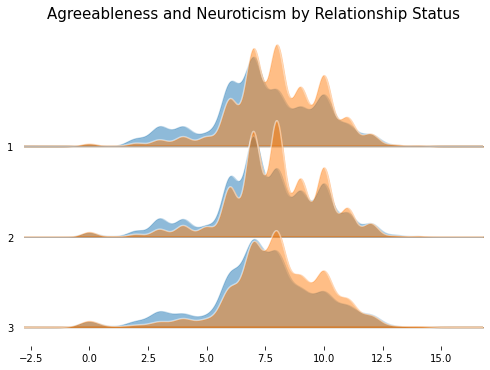

In [26]:
#PLOT KEY TIPI TRAITS VERSUS RELATIONSHIP
# Draw Plot
jp.joyplot(major_data, column=["agreeable","neuroticism"], by="married", linecolor = "white", figsize=(7,5),grid = 'y', alpha= 0.5)

# Decoration
plt.title('Agreeableness and Neuroticism by Relationship Status', fontsize=15)
plt.show()

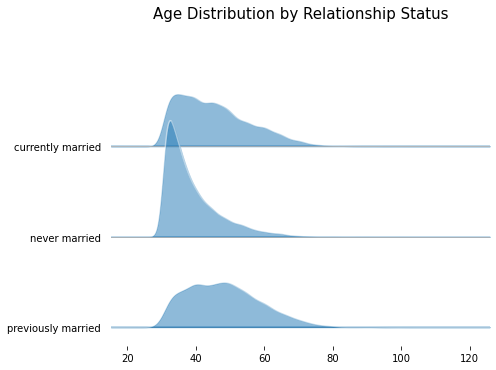

In [27]:
#PLOT AGE VERSUS RELATIONSHIP
# Draw Plot
jp.joyplot(major_data, column="age", by="marriedstr", linecolor = "white", figsize=(7,5), alpha= 0.5, grid = 'y')

# Decoration
plt.title('Age Distribution by Relationship Status', fontsize=15)
plt.show()

marriedstr  currently married  never married  previously married
voc_fake                                                        
0                    0.480803       0.326917            0.192280
1                    0.492821       0.300887            0.206292
2                    0.448524       0.295291            0.256185
3                    0.439904       0.346154            0.213942


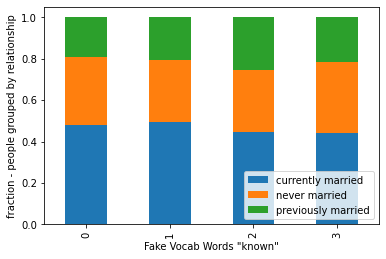

In [28]:
#MACH IV vs FAKE_VOC
count_matrix = major_data.groupby(['voc_fake', 'marriedstr']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.xlabel('Fake Vocab Words "known"')
plt.ylabel('fraction - people grouped by relationship')
plt.legend(loc=4)
plt.show()

In [40]:
#EXPORT TO CSV
major_data.to_csv('/users/ktoleary.13/Desktop/DATA1030_Proj/mach_rel_classification/data/data_edit1.csv', index = False)

## Figures for Report

In [41]:
#install data visualization package
!pip install seaborn
import seaborn as sns

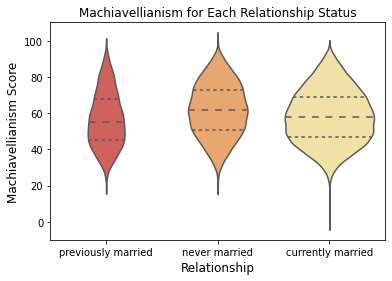

In [51]:
#violin plot of Mscore vs relationship status
#MACH SCORE VS RELATIONSHIP _ continuous vs categorical
flare = sns.color_palette("Spectral")
ax = sns.violinplot(x="marriedstr", y="Mscore",data=major_data, palette=flare, scale="count", inner="quartile")
ax.set_xlabel("Relationship", fontsize = 12)
ax.set_ylabel("Machiavellianism Score", fontsize = 12)
ax.set_title("Machiavellianism for Each Relationship Status")
plt.savefig('/users/ktoleary.13/Desktop/DATA1030_Proj/mach_rel_classification/figures/rel_mach_violin.pdf')#save to folder

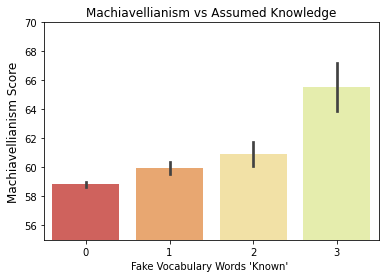

In [52]:
#disagreeableness vs machscore
#cat vs cont
ax = sns.barplot(x="voc_fake", y="Mscore", data=major_data, palette=flare)
ax.set(ylim=(55, 70))
ax.set_ylabel("Machiavellianism Score", fontsize = 12)
ax.set_xlabel("Fake Vocabulary Words 'Known' ")
ax.set_title("Machiavellianism vs Assumed Knowledge")
plt.savefig('/users/ktoleary.13/Desktop/DATA1030_Proj/mach_rel_classification/figures/voc_mach_violin.pdf')#save to folder

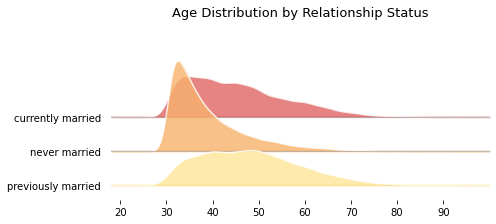

In [47]:
#PLOT AGE VERSUS RELATIONSHIP
# Draw Plot
pal = list(["#e06666","#f6b26b","#ffe599"])
jp.joyplot(major_data, column="age", by="marriedstr",overlap = 1.5, color = pal, alpha = 0.8, x_range=[18,100],
           linecolor = "white", figsize=(7,3), grid = 'y')

# Decoration
plt.title('Age Distribution by Relationship Status', fontsize=13)
plt.ylabel('Age')

plt.savefig('/users/ktoleary.13/Desktop/DATA1030_Proj/mach_rel_classification/figures/rel_age_ridges.pdf')#save figure
plt.show()


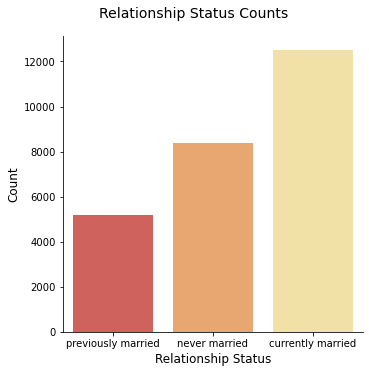

In [50]:
#relationship status bar plot
ax = sns.catplot(x= "marriedstr", kind = "count",data=major_data, palette=flare)
ax.set_ylabels('Count', fontsize=12) # not set_label
ax.set_xlabels('Relationship Status', fontsize=12)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Relationship Status Counts', fontsize = 14)
plt.savefig('/users/ktoleary.13/Desktop/DATA1030_Proj/mach_rel_classification/figures/rel_count_bar.pdf')